In [5]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')



df=pd.read_csv("C:/Users/iamal/Downloads/healthcare_noshows.csv")
print(df.info())
print(df.describe())
print(df.head(5))
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106987 non-null  float64
 1   AppointmentID   106987 non-null  int64  
 2   Gender          106987 non-null  object 
 3   ScheduledDay    106987 non-null  object 
 4   AppointmentDay  106987 non-null  object 
 5   Age             106987 non-null  int64  
 6   Neighbourhood   106987 non-null  object 
 7   Scholarship     106987 non-null  bool   
 8   Hipertension    106987 non-null  bool   
 9   Diabetes        106987 non-null  bool   
 10  Alcoholism      106987 non-null  bool   
 11  Handcap         106987 non-null  bool   
 12  SMS_received    106987 non-null  bool   
 13  Showed_up       106987 non-null  bool   
 14  Date.diff       106987 non-null  int64  
dtypes: bool(7), float64(1), int64(3), object(4)
memory usage: 7.2+ MB
None
          PatientId  Appointmen

In [7]:
print(df.columns)


Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
       'Date.diff'],
      dtype='object')


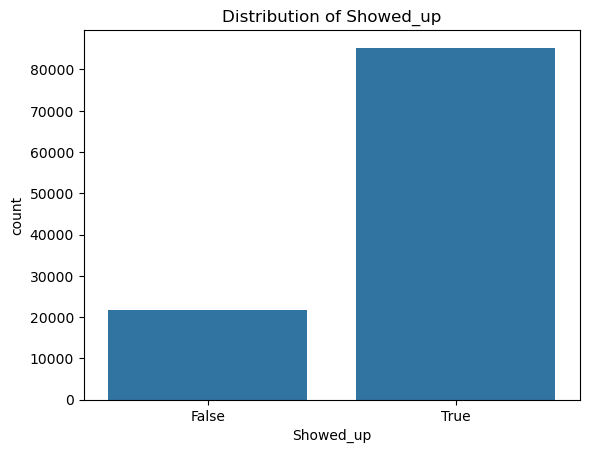

In [9]:
# Plot the distribution of the target variable 'Showed_up'
sns.countplot(x='Showed_up', data=df)
plt.title('Distribution of Showed_up')
plt.show()

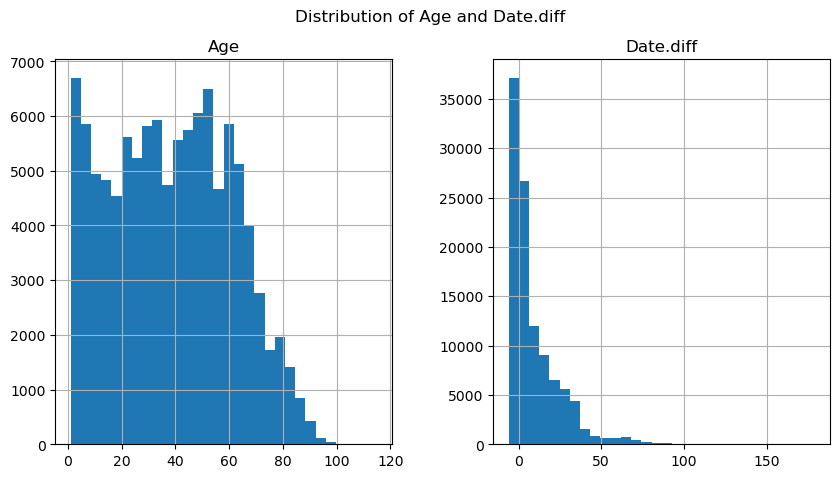

In [11]:
# Plot distributions of numerical features
df[['Age', 'Date.diff']].hist(bins=30, figsize=(10, 5))
plt.suptitle('Distribution of Age and Date.diff')
plt.show()

## Data cleaning and preprocessing

In [14]:
# Drop unnecessary columns
X = df.drop(columns=['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'])

# One-Hot Encode categorical columns
X = pd.get_dummies(X, columns=['Gender', 'Neighbourhood'], drop_first=True)

# Check which columns are numerical
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Scale the numerical features
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Models

In [17]:
from sklearn.model_selection import train_test_split

#  target variable is 'Showed_up'
y = df['Showed_up']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random forest classifier

In [20]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# More detailed evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      4325
        True       1.00      1.00      1.00     17073

    accuracy                           1.00     21398
   macro avg       1.00      1.00      1.00     21398
weighted avg       1.00      1.00      1.00     21398

[[ 4325     0]
 [    0 17073]]


In [24]:
y.value_counts()

Showed_up
True     85307
False    21680
Name: count, dtype: int64

In [26]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

y_pred = model.predict(X_test)  # Predict using trained model
print(classification_report(y_test, y_pred))

# For ROC-AUC score
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba)}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      4325
        True       1.00      1.00      1.00     17073

    accuracy                           1.00     21398
   macro avg       1.00      1.00      1.00     21398
weighted avg       1.00      1.00      1.00     21398

ROC-AUC Score: 1.0


In [31]:
scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean CV Score: {scores.mean()}")

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0


## Smote

In [33]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE()

# Apply SMOTE to your training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train your model
model = RandomForestClassifier()
model.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [37]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      4325
        True       1.00      1.00      1.00     17073

    accuracy                           1.00     21398
   macro avg       1.00      1.00      1.00     21398
weighted avg       1.00      1.00      1.00     21398

ROC-AUC Score: 1.0


In [39]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Create SMOTE and RandomUnderSampler instances
smote = SMOTE()
undersampler = RandomUnderSampler()

# Create a pipeline combining both
pipeline = Pipeline([
    ('SMOTE', smote),
    ('RandomUnderSampler', undersampler)
])

# Apply the pipeline to your training data
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [41]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0


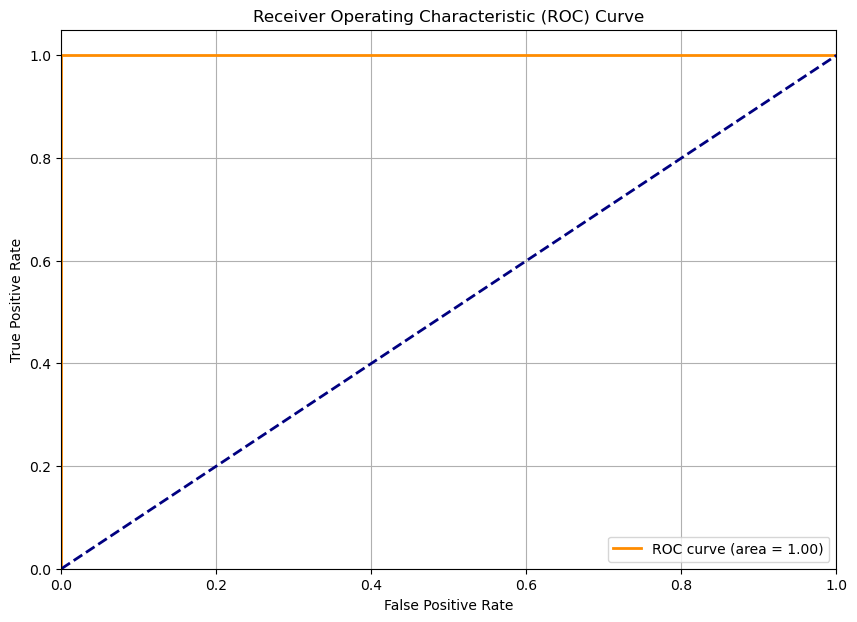

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

#
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## FNN

In [46]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

Epoch 1/5
2140/2140 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9621 - loss: 0.0947 - val_accuracy: 1.0000 - val_loss: 3.8702e-05
Epoch 2/5
2140/2140 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 1.0000 - loss: 2.4961e-05 - val_accuracy: 1.0000 - val_loss: 6.0683e-06
Epoch 3/5
2140/2140 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 1.0000 - loss: 4.3798e-06 - val_accuracy: 1.0000 - val_loss: 1.4985e-06
Epoch 4/5
2140/2140 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 1.0000 - loss: 1.1391e-06 - val_accuracy: 1.0000 - val_loss: 4.2297e-07
Epoch 5/5
2140/2140 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 1.0000 - loss: 3.2045e-07 - val_accuracy: 1.0000 - val_loss: 1.2652e-07
669/669 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 1.3228e-07
Test accuracy: 1.0000


In [48]:
# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print classification report
print(classification_report(y_test, y_pred))

669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      4325
        True       1.00      1.00      1.00     17073

    accuracy                           1.00     21398
   macro avg       1.00      1.00      1.00     21398
weighted avg       1.00      1.00      1.00     21398

